# Email Spam Detector 

Email Scam Detector is a system which lets you know regarding the email you receive are from different sources are ham or spam based on the context inside the email and lets you aware regarding the different soruces as genuine or fake.

Importing Libraries

In [1]:
import numpy as np
import pandas as pd

Loading the dataset from Kaggle (encoding="ISO-8859-1" is a parameter that tells pandas that the file is encoded in UTF-8 in ASCII code)

In [4]:
df = pd.read_csv("C:/Users/KAUSTUBH/Desktop/Preventia/spam.csv",encoding= "ISO-8859-1")

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
216,ham,"As I entered my cabin my PA said, '' Happy B'd...",NaN,NaN,NaN
880,ham,"Well am officially in a philosophical hole, so...",NaN,NaN,NaN
4636,spam,Please call our customer service representativ...,NaN,NaN,NaN
455,ham,"Sorry, my battery died, I can come by but I'm ...",NaN,NaN,NaN
704,ham,Ah poop. Looks like ill prob have to send in m...,NaN,NaN,NaN


In [6]:
#checking the shape of the sample (i.e. number of rows and columns)
df.shape

(5582, 5)

Steps we will be performing to build this project
1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvements
7. Website
8. Deploy

# Data Cleaning

In [7]:
#getting the overall information of the used dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5582 entries, 0 to 5581
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5582 non-null   object
 1   v2          5582 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 218.2+ KB


In [8]:
#As we can see that 3 columns Unnamed 2, 3, 4 contains the least nmuber of asset we will drop these columns
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace= True)

In [9]:
# and rename the remaining columns v1 = target an v2 = text
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [10]:
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# we will change the target column inputs as 0 and 1 from ham and spam
from sklearn.preprocessing import LabelEncoder

C:\Users\KAUSTUBH\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
encoder=LabelEncoder()

In [13]:
df["target"] = encoder.fit_transform(df["target"])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#checking for the missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
#checking for the duplicate values
df.duplicated().sum()

404

In [17]:
# as their are 403 duplicate present in the dataset we will drop them and then consider the dataset
df = df.drop_duplicates(keep="first")

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5178, 2)

# EDA 

In [20]:
#checking the number of ham and spam messages in the target column
df["target"].value_counts()

0    4516
1     662
Name: target, dtype: int64

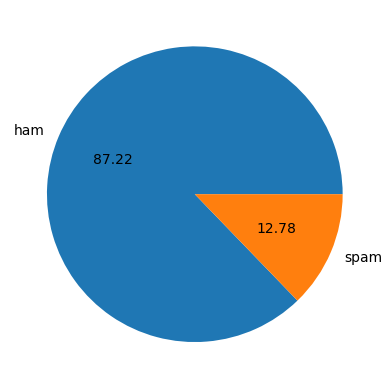

In [21]:
#representing the ham and spam data using a pie chart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=["ham","spam"], autopct="%0.2f")
plt.show()

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KAUSTUBH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
# calculating the number of characters in each row of text of the dataset 
df['num_characters'] = df["text"].apply(len)

In [25]:
#calculating the number of words in each row of text of the dataset
df["num_words"] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
#calculating the number of sentences in each row of text of the dataset
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences
739,0,Dunno y u ask me.,17,6,1
3814,0,Dude while were makin those weirdy brownies my...,88,17,2
5565,0,Yeh. Indians was nice. Tho it did kane me off ...,153,43,6
2490,1,Urgent! call 09066612661 from landline. Your c...,169,33,3
4800,0,Send me your resume:-),22,7,1


In [28]:
#calculating a tabular format of the new three columns created 
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5178.000000,5178.000000,5178.000000
mean,79.314407,18.458671,1.947856
std,58.328041,13.316373,1.362734
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
#calculating for ham messages seperately
df[df['target'] == 0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.684234,17.120903,1.799601
std,56.435582,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
#calculating for spam messages seperately
df[df['target'] == 1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,662.000000,662.000000,662.000000
mean,138.187311,27.584592,2.959215
std,30.177658,7.034254,1.485125
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,225.000000,46.000000,8.000000


In [31]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

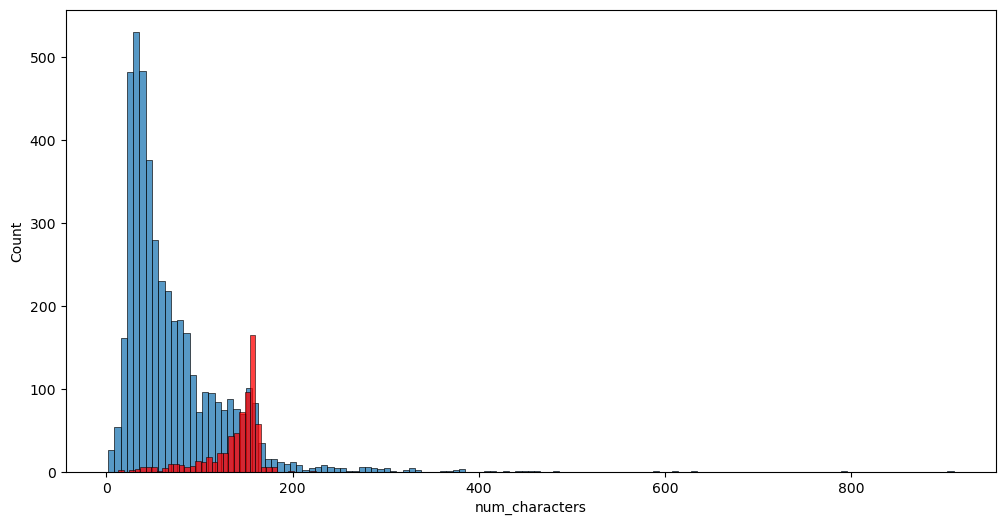

In [32]:
#comparison of num_characters of ham messages to spam messages
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"] == 0] ['num_characters'])
sns.histplot(df[df["target"] == 1] ['num_characters'], color="red")

as the chart indicates that the size (num_characters) of the spam messages in count is very high in comparison to the ham messages this even helps as an indication to distinguish between the same


<AxesSubplot:xlabel='num_words', ylabel='Count'>

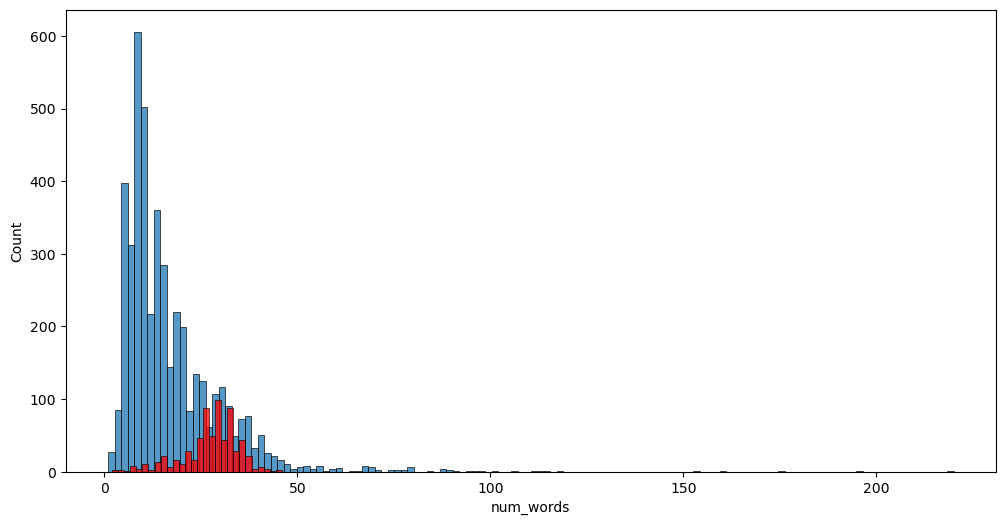

In [33]:
#similarly we will calculate for num_words
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"] == 0] ['num_words'])
sns.histplot(df[df["target"] == 1] ['num_words'], color="red")

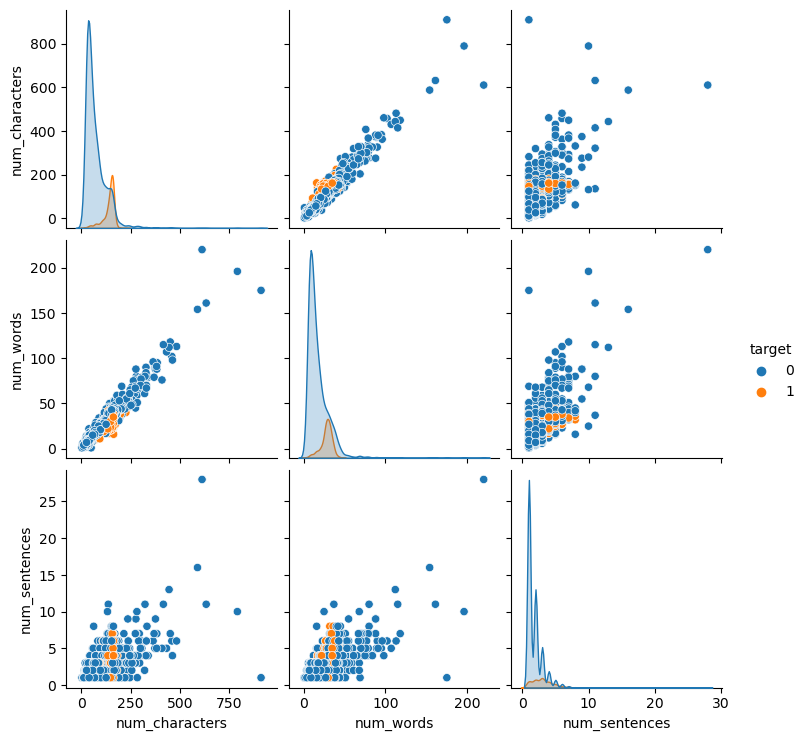

In [34]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

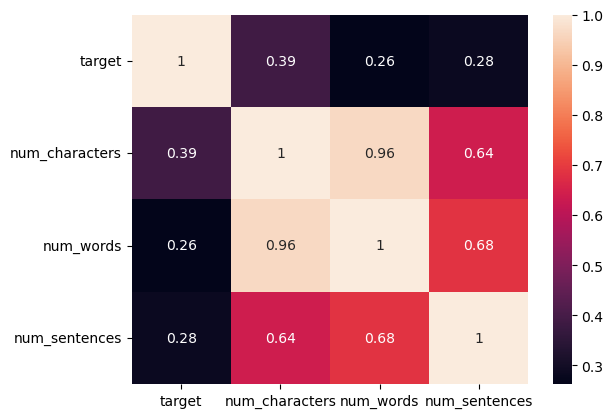

In [35]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

In [47]:
#creating a function that will word of lower_case, tokenize, remove special_characters, stop words and punctuation along with stemming in the dataset
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [45]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [38]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [39]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KAUSTUBH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [48]:
df['transformed_text'] = df['text'].apply(transform_text)

In [49]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
pip install wordcloud


     -------------------------------------- 300.6/300.6 kB 9.4 MB/s eta 0:00:00


In [52]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500, min_font_size=10, background_color='white')

In [53]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

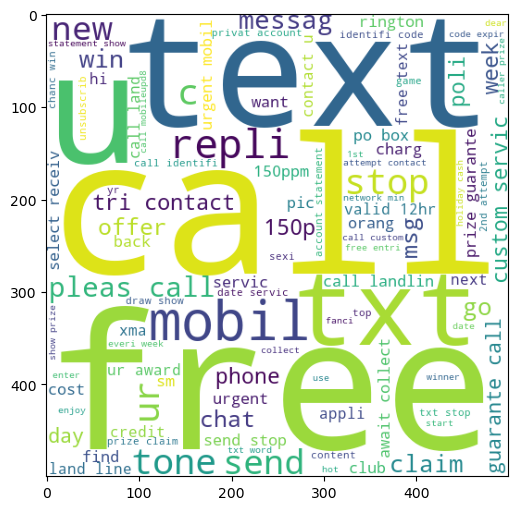

In [54]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [55]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

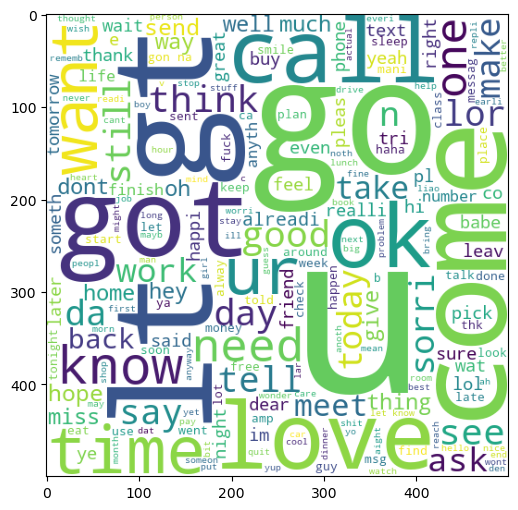

In [56]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [57]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [58]:
len(spam_corpus)

10031

C:\Users\KAUSTUBH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


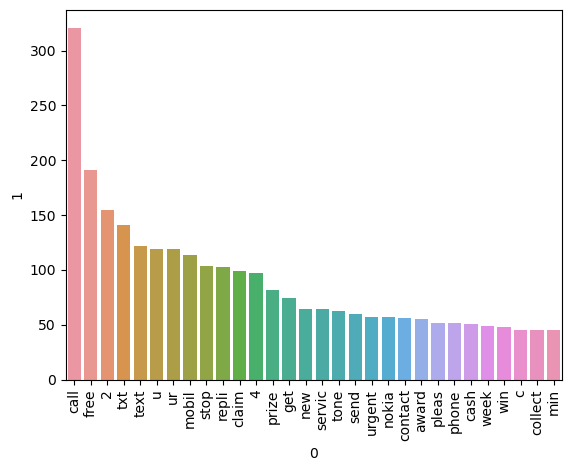

In [59]:
# calculating the most common 30 words that are repeated in ham messages most number of time 
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation ='vertical')
plt.show()

In [60]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [61]:
len(ham_corpus)

35295

C:\Users\KAUSTUBH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


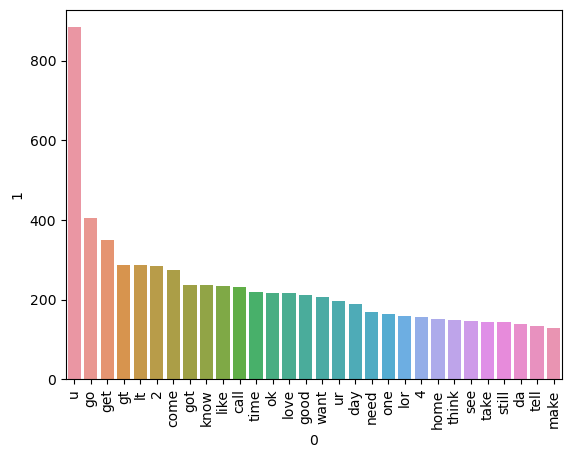

In [62]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation ='vertical')
plt.show()

# Model Building

In [63]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [64]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [65]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [66]:
X.shape

(5178, 3000)

In [67]:
y = df['target'].values

In [68]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [71]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [72]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [73]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8667953667953668
[[773 118]
 [ 20 125]]
0.51440329218107


In [74]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9671814671814671
[[890   1]
 [ 33 112]]
0.9911504424778761


In [75]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9777992277992278
[[890   1]
 [ 22 123]]
0.9919354838709677


In [76]:
# we chhosed tfidf --> MNB

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [78]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [79]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [80]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [81]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9739382239382239, 0.9758064516129032)

In [82]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9739382239382239
Precision -  0.9758064516129032


C:\Users\KAUSTUBH\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.9025096525096525
Precision -  1.0
For  NB
Accuracy -  0.9671814671814671
Precision -  0.9911504424778761
For  DT
Accuracy -  0.9237451737451737
Precision -  0.83
For  LR
Accuracy -  0.9498069498069498
Precision -  0.9345794392523364
For  RF
Accuracy -  0.9681467181467182
Precision -  0.9912280701754386
For  AdaBoost
Accuracy -  0.9546332046332047
Precision -  0.9298245614035088
For  BgC
Accuracy -  0.9555984555984556
Precision -  0.8413793103448276
For  ETC
Accuracy -  0.972007722007722
Precision -  0.9833333333333333
For  GBDT
Accuracy -  0.946911196911197
Precision -  0.9326923076923077
For  xgb
Accuracy -  0.9594594594594594
Precision -  0.905511811023622


In [83]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [84]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.902510,1.000000
5,RF,0.968147,0.991228
2,NB,0.967181,0.991150
8,ETC,0.972008,0.983333
0,SVC,0.973938,0.975806
4,LR,0.949807,0.934579
9,GBDT,0.946911,0.932692
6,AdaBoost,0.954633,0.929825
10,xgb,0.959459,0.905512
7,BgC,0.955598,0.841379


In [85]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [86]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.902510
1,RF,Accuracy,0.968147
2,NB,Accuracy,0.967181
3,ETC,Accuracy,0.972008
4,SVC,Accuracy,0.973938
5,LR,Accuracy,0.949807
6,GBDT,Accuracy,0.946911
7,AdaBoost,Accuracy,0.954633
8,xgb,Accuracy,0.959459
9,BgC,Accuracy,0.955598


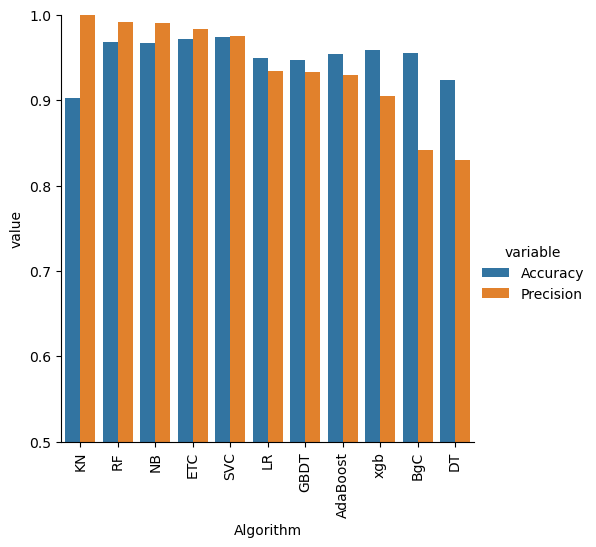

In [87]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Improvement

In [88]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [89]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [90]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [91]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [92]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [93]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.902510,1.000000,0.902510,1.000000,0.902510,1.000000,0.902510,1.000000
1,RF,0.968147,0.991228,0.968147,0.991228,0.968147,0.991228,0.968147,0.991228
2,NB,0.967181,0.991150,0.967181,0.991150,0.967181,0.991150,0.967181,0.991150
3,ETC,0.972008,0.983333,0.972008,0.983333,0.972008,0.983333,0.972008,0.983333
4,SVC,0.973938,0.975806,0.973938,0.975806,0.973938,0.975806,0.973938,0.975806
5,LR,0.949807,0.934579,0.949807,0.934579,0.949807,0.934579,0.949807,0.934579
6,GBDT,0.946911,0.932692,0.946911,0.932692,0.946911,0.932692,0.946911,0.932692
7,AdaBoost,0.954633,0.929825,0.954633,0.929825,0.954633,0.929825,0.954633,0.929825
8,xgb,0.959459,0.905512,0.959459,0.905512,0.959459,0.905512,0.959459,0.905512
9,BgC,0.955598,0.841379,0.955598,0.841379,0.955598,0.841379,0.955598,0.841379


In [94]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [95]:
(mnb.fit(X_train,y_train))

MultinomialNB()

In [96]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [97]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [98]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787644787644788
Precision 0.984251968503937


In [99]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))